<a href="https://colab.research.google.com/github/utpalrtw/Number-plate-detaction/blob/main/IPL_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


## link of data : {https://drive.google.com/file/d/1qlm4OnaAM3bdgti9xyUqK3eSFokjYdA-/view?usp=drive_link}

In [4]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


##Data Pre-processing
 Dropping unimportant features

* We have created a new dataframe by dropping several columns from the original DataFrame.

* The new DataFrame contains the remaining columns that we are going to train the predictive model.

In [5]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [6]:
X = df.drop(['total'], axis =1)
y = df['total']


 ##Label Encoding

* We have applied label encoding to your categorical features in X.
* We have created separate LabelEncoder objects for each categorical feature and encoded their values.
* We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [7]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


##Train Test Split

In [8]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [12]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0817 - val_loss: 21.9541
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 21.8800 - val_loss: 21.6891
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.0184 - val_loss: 21.6022
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.9541 - val_loss: 21.5568
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 21.7904 - val_loss: 21.6306
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.7067 - val_loss: 21.5780
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 21.8392 - val_loss: 21.4833
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 21.6225 - val_loss: 21.4762
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 21.7212 - val_loss: 21.3118
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 21.5847 - val_loss: 21.3118
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 21.5903 - val_loss: 21.8175
Epoch 12/50
832/832 ━━━━━━━━

<Axes: >

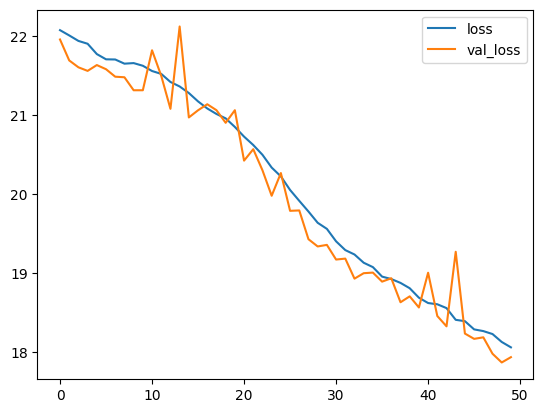

In [13]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [14]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


18.423386308953994

In [15]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [16]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

Predicted the score. by giving description.

By harnessing the power of ML and DL, we have successfully predicted the cricket scores based on historical data. The model’s ability to predict cricket scores can be a valuable asset for IPL enthusiasts, teams, and analysts. It can provide insights into the dynamics of a match and help anticipate how different factors impact the final score

##Conclusion:
the application of deep learning in IPL score prediction represents a transformative approach to cricket analytics. By harnessing the power of advanced algorithms and historical data, teams and analysts can forecast match outcomes with greater accuracy than ever before. This not only enhances strategic decision-making during live matches but also enriches the fan experience by providing real-time insights and predictions. As technology continues to evolve, the future of cricket analytics promises to be increasingly data-driven, offering new opportunities to unravel the complexities of the game and elevate its competitive edge.